# Introduction
In this project, I aim to predict the future stock price of Mercedes-Benz using historical stock data. I will utilize an LSTM (Long Short-Term Memory) neural network, which is a type of recurrent neural network (RNN) that is well-suited for time series forecasting. 

The dataset spans from January 2020 onwards, and I will train the model using closing price data to predict future stock prices. Afterward, I will visualize both historical and predicted prices, allowing me to assess the model's performance.

### Importing Libraries

I start by importing necessary libraries. pandas and numpy are used for data manipulation, matplotlib and seaborn for visualizations, and TensorFlow for creating the LSTM model. 

MinMaxScaler will normalize the data, which helps in improving model performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

### Loading and Preprocessing the Data

load the Mercedes-Benz stock data from a CSV file and convert the Date column to a datetime object for easier manipulation. I also set the Date column as the index to properly format the dataset for time series analysis.

I inspect the first few rows of the dataset with df.head() and provide a summary of its statistics using df.describe(). This step helps me understand the data’s structure and distribution.

In [2]:
# Load the data
df = pd.read_csv('/kaggle/input/mercedes-benz-historical-stock-dataset/MBG.DE.csv')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df = df.set_index('Date')

# Explore the data
print(df.head())
print(df.describe())

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-01-02  41.092484  41.845215  40.971882  41.566578  33.846729  2973654
2020-01-03  41.296261  41.362801  40.302322  40.813847  33.233799  4014262
2020-01-06  40.202515  40.593433  39.703465  40.593433  33.054317  3441396
2020-01-07  40.797215  41.208927  40.680767  40.917816  33.318455  2816618
2020-01-08  40.589275  41.167339  40.489468  41.146545  33.504704  2659070
              Open         High          Low        Close    Adj Close  \
count  1105.000000  1105.000000  1105.000000  1105.000000  1105.000000   
mean     57.601284    58.280954    56.878953    57.592108    52.302903   
std      14.356715    14.382103    14.309748    14.356889    15.105935   
min      18.061396    19.225842    17.479174    18.165363    14.791645   
25%      50.395580    52.060001    49.988022    50.619999    45.035072   
50%      62.080002    62.730000

### Visualizing the Closing Price
To get an initial feel for the data, I plot the historical closing prices over time. This graph helps visualize the stock's trends and fluctuations, making it easier to interpret later predictions.

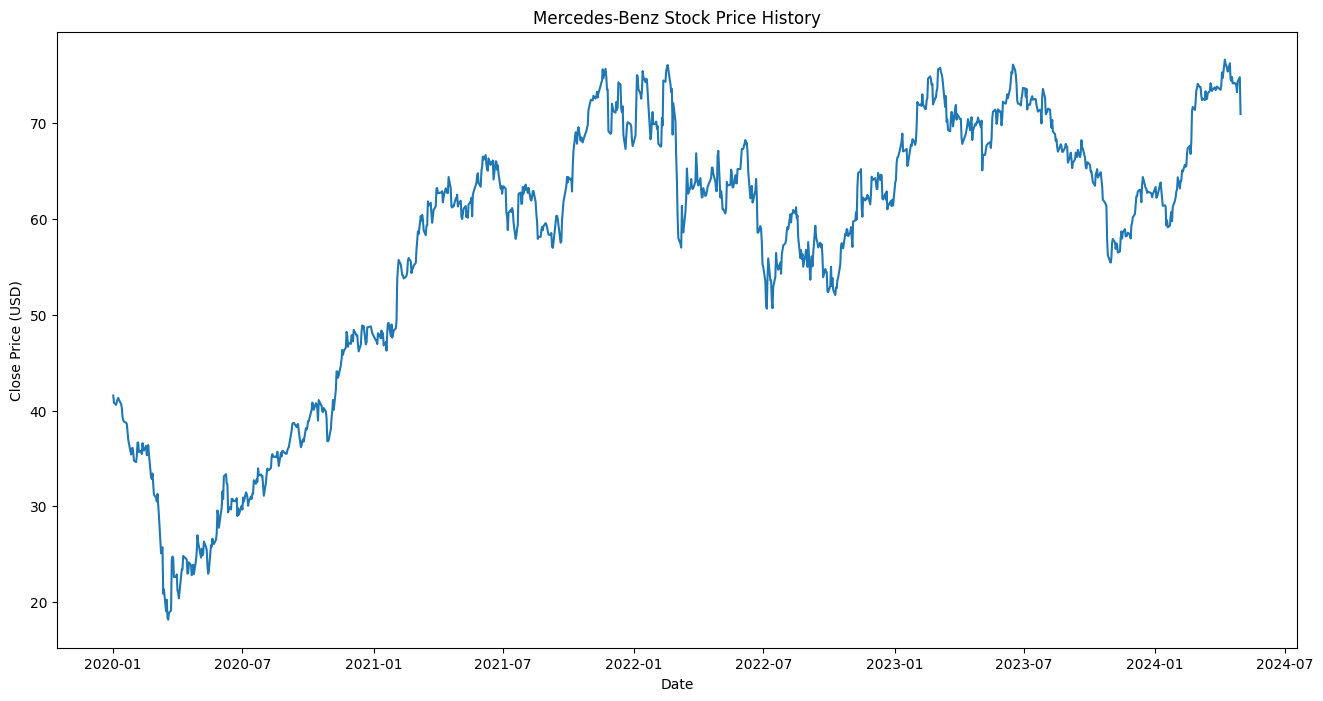

In [3]:
# Visualize the closing price
plt.figure(figsize=(16, 8))
plt.title('Mercedes-Benz Stock Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.show()

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1.105000e+03
mean,57.601284,58.280954,56.878953,57.592108,52.302903,3.783187e+06
std,14.356715,14.382103,14.309748,14.356889,15.105935,2.648432e+06
min,18.061396,19.225842,17.479174,18.165363,14.791645,0.000000e+00
25%,50.395580,52.060001,49.988022,50.619999,45.035072,2.178624e+06
50%,62.080002,62.730000,61.366329,62.031727,55.401306,3.027640e+06
75%,68.089996,68.650002,67.309998,67.978722,63.179527,4.398045e+06
max,76.940002,77.900002,75.949997,76.610001,76.610001,2.443688e+07


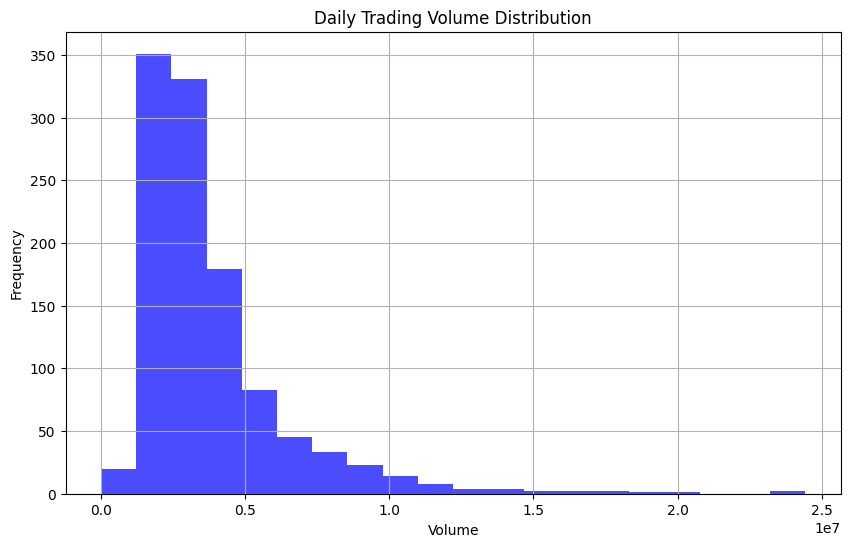

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['Volume'], bins=20, color='blue', alpha=0.7)
plt.title('Daily Trading Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Preparing the Data for LSTM
I extract the closing prices (Close) to be used as my target variable. I also split the dataset, reserving 95% for training and the remaining 5% for testing. 

This split ensures the model has sufficient data to learn from while leaving enough for evaluation.

In [6]:
# Prepare the data for LSTM
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * .95))

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training dataset
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Building the LSTM Model
create a Sequential model and add two LSTM layers. The first LSTM layer returns the sequences to pass data to the next layer. I also include Dense layers to map the LSTM outputs to the desired format.

In [7]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


990/990 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - loss: 0.0150


I prepare the test dataset in the same way as the training dataset, using the previous 60 days to predict the next day's closing price. This ensures the model can be evaluated on data it hasn't seen before.

### Making Predictions
I make predictions using the LSTM model and inverse-transform the results to convert the scaled values back to their original format.

In [8]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('Root Mean Squared Error:', rmse)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 299ms/step
Root Mean Squared Error: 1.5107491014175638


### Visualizing the Results
I visualize the model’s predictions compared to the actual values, plotting both the training and validation sets, along with the predicted values.

/tmp/ipykernel_18/2890152099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


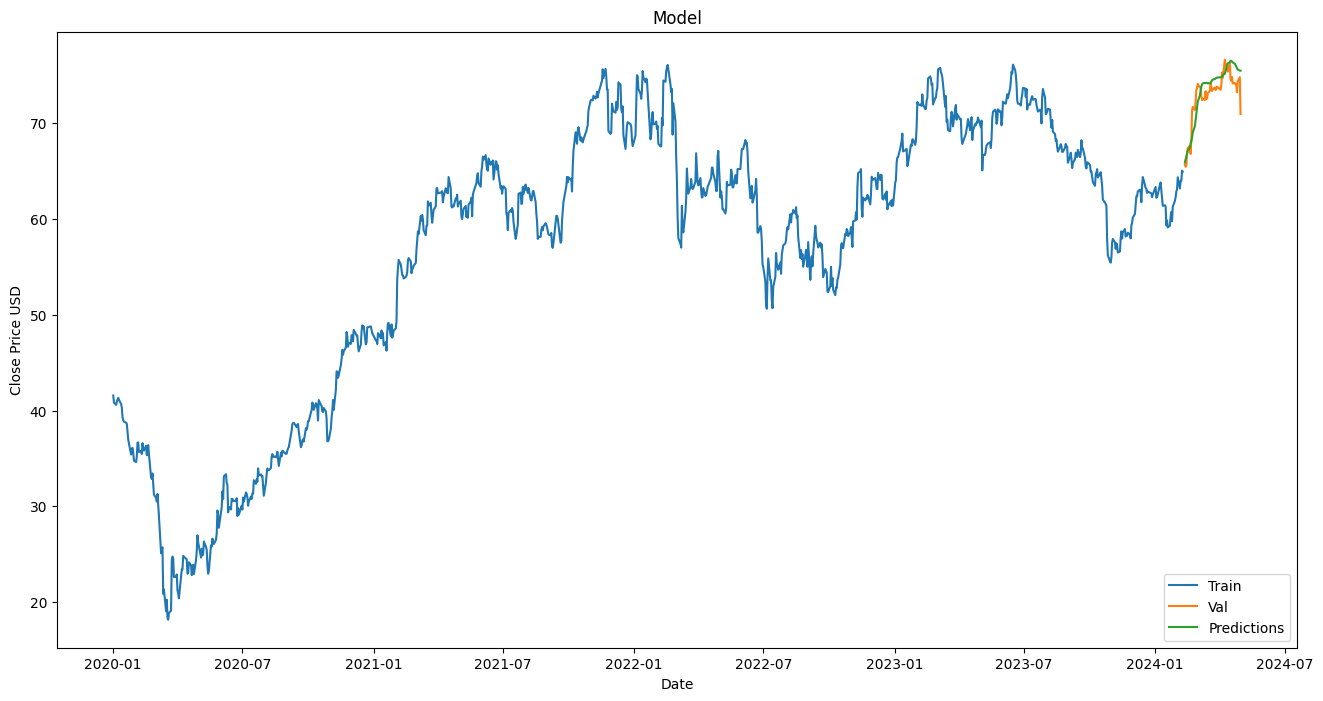

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the results
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

 ### Generating Future Predictions
I generate predictions for the next 60 days by taking the last 60 days of data, feeding it into the model, and using each new prediction as input for the following day's forecast.

In [10]:
# Create a new dataset for future predictions
last_60_days = scaled_data[-60:]

# Create an empty list to store future predictions
future_predictions = []

# Loop through the next 60 days
for i in range(60):
    x_future = np.array([last_60_days])
    x_future = np.reshape(x_future, (x_future.shape[0], x_future.shape[1], 1))

    prediction = model.predict(x_future)

    # Append the prediction to the future predictions list
    future_predictions.append(prediction[0][0])

    # Update the last 60 days with the new prediction
    last_60_days = np.append(last_60_days[1:], prediction)

# Inverse transform the predictions to get the actual price values
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

### Visualizing Future Predictions
Finally, I create a new dataset for the future predictions and visualize them alongside the historical data. This helps to forecast the next 60 days of stock prices.

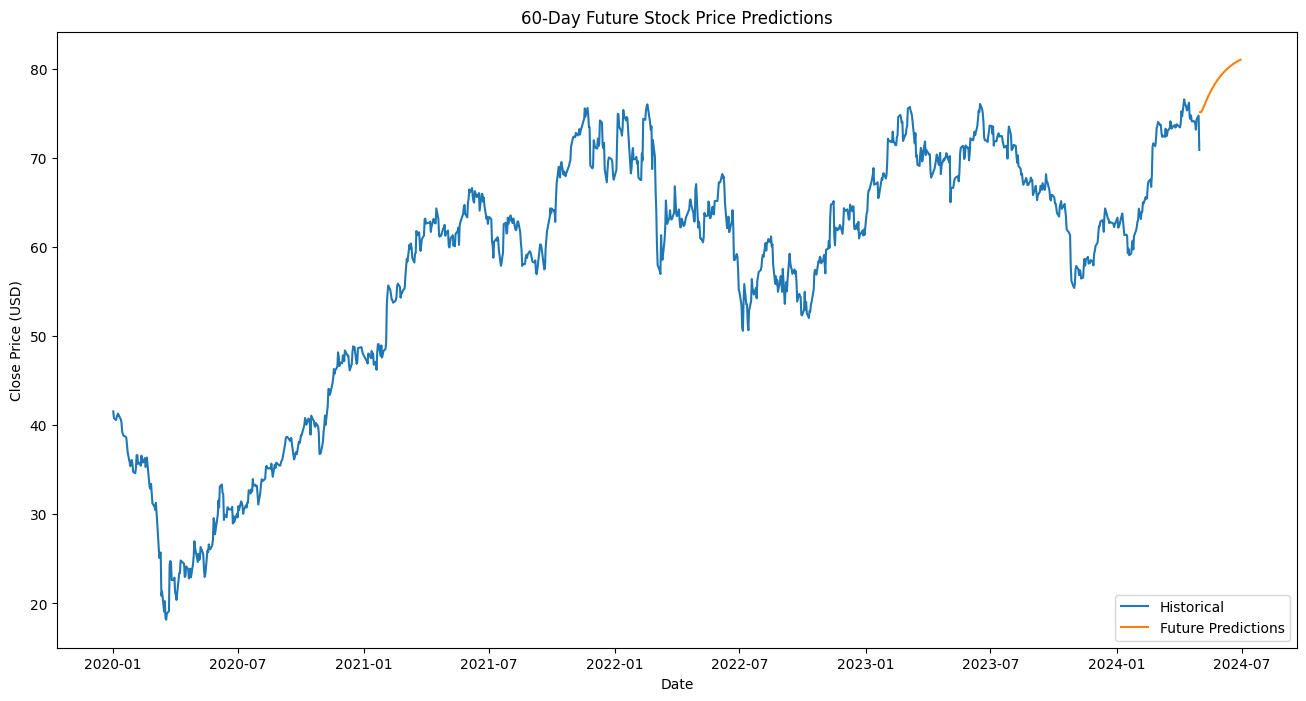

In [11]:
# Create a date range for the future predictions
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=60)

# Create a DataFrame for the future predictions
future_df = pd.DataFrame({'Predictions': future_predictions.flatten()}, index=future_dates)

# Plot the future predictions
plt.figure(figsize=(16, 8))
plt.title('60-Day Future Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.plot(df['Close'])
plt.plot(future_df['Predictions'])
plt.legend(['Historical', 'Future Predictions'], loc='lower right')
plt.show()

# Conclusion
This project successfully demonstrates how to use an LSTM model to predict the stock prices of Mercedes-Benz. Although the RMSE shows a reasonable performance, further tuning of the model parameters, such as increasing epochs and adjusting the number of LSTM units, could enhance accuracy. 